# ACF Plotting Activity
## DS150 Time Series Analysis

*Chamorro, Hans Marvin N.* | *A37* | *01/03/2024*

### Instructions

Perform the given tasks as described on each item using only the given libraries below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

#### 1. Create a Random Walk Time Series from `numpy` with given specifications

The random walk should be:
- A set seed of `337` is given
- A random number generator `MT19937` should be used
- The data point starts at 100
- Simulate a coin flip: If it lands heads, add 1 to the previous data point, otherwise subtract 1 to the previous data point
- Append the result at the end of the series
- Repeat the process 500 times

Plot the given result and its ACF plot using `numpy`.

In [2]:
# Write your code here. Add cells if necessary
MT = np.random.MT19937(337)
NewGen = np.random.default_rng(MT)
Walk = [100]

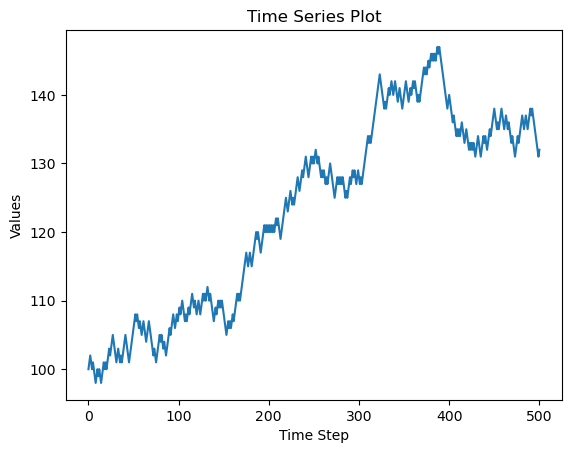

In [3]:
for _ in range(500):
    Coin = NewGen.choice([1,-1])
    Add = Walk[-1] + Coin
    Walk.append(Add) 
Results = np.array(Walk)
plt.plot(Walk)
plt.title('Time Series Plot')
plt.xlabel('Time Step')
plt.ylabel('Values')
plt.show()

In [4]:
def autocorr(x, t):
    if t == 0:
        return np.corrcoef(np.array([x, x]))[0,1]
    return np.corrcoef(np.array([x[:-t], x[t:]]))[0,1]

In [5]:
N_LAGS = 30
res_autocorr = np.empty(N_LAGS)

for i in np.arange(N_LAGS):
    res_autocorr[i] = autocorr(Results, i)

res_autocorr

array([1.        , 0.99753013, 0.99504923, 0.99266623, 0.99065576,
       0.98853147, 0.98653965, 0.98457761, 0.98292273, 0.98136786,
       0.97985009, 0.97798857, 0.97596775, 0.97381936, 0.9711536 ,
       0.96806642, 0.96517092, 0.96217784, 0.95907268, 0.95630193,
       0.95368164, 0.95133339, 0.94908879, 0.94671843, 0.94463979,
       0.94258957, 0.94050631, 0.93863721, 0.93631115, 0.93414746])

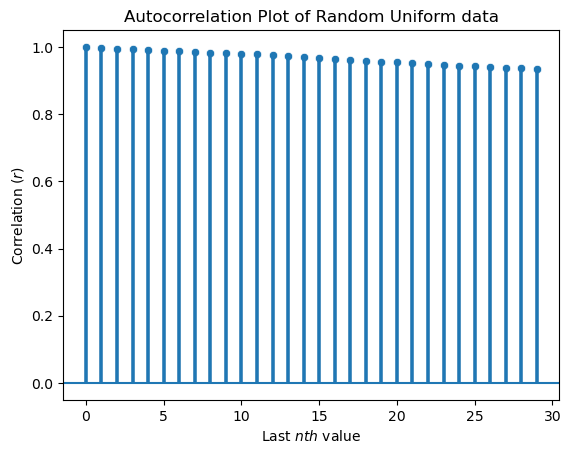

In [6]:
fig, ax = plt.subplots()
x_data = np.arange(res_autocorr.size)

sns.scatterplot(x=x_data, y=res_autocorr, ax=ax)
ax.axhline(0)

for point in res_autocorr:
    ax.vlines(x_data, ymin=0, ymax=res_autocorr)

ax.set_xlabel('Last $nth$ value')
ax.set_ylabel('Correlation ($r$)')
ax.set_title(f'Autocorrelation Plot of Random Uniform data')

plt.show()

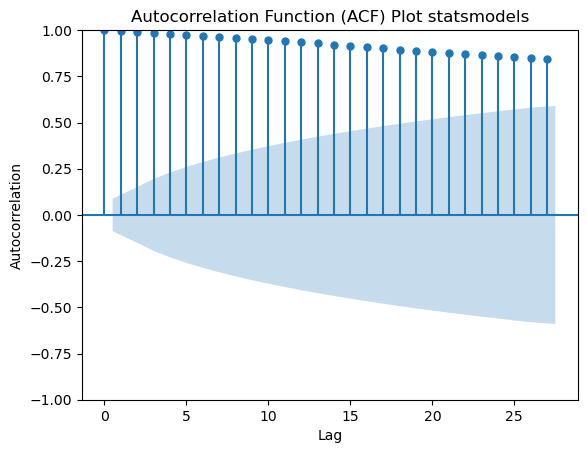

In [7]:
plot_acf(Results)
plt.title('Autocorrelation Function (ACF) Plot statsmodels')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

#### 2. Using the given data, decompose the given data and plot its ACF

The data is given in the variable `elec_consumption`

Perform the given tasks:
- Get the 1st differencing using the column `IPG2211A2N`
- Using the differenced value, show an ACF plot using `statsmodels`
- Get the 4th differencing using the column `IPG2211A2N`
- Using the newly differenced value, show an ACF plot using `statsmodels`

In [8]:
elec_consumption = pd.read_csv('https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/Electric_Production.csv')
elec_consumption.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [9]:
dfColumns = ['IPG2211A2N']
df = elec_consumption[dfColumns]
df.head()

,IPG2211A2N
0,72.5052
1,70.6720
2,62.4502
3,57.4714
4,55.3151


In [10]:
Ndata = np.array(df)
Ndata2 = Ndata.flatten()
Ndata2

array([ 72.5052,  70.672 ,  62.4502,  57.4714,  55.3151,  58.0904,
        62.6202,  63.2485,  60.5846,  56.3154,  58.0005,  68.7145,
        73.3057,  67.9869,  62.2221,  57.0329,  55.8137,  59.9005,
        65.7655,  64.4816,  61.0005,  57.5322,  59.3417,  68.1354,
        73.8152,  70.062 ,  65.61  ,  60.1586,  58.8734,  63.8918,
        68.8694,  70.0669,  64.1151,  60.3789,  62.4643,  70.5777,
        79.8703,  76.1622,  70.2928,  63.2384,  61.4065,  67.1097,
        72.9816,  75.7655,  67.5152,  63.2832,  65.1078,  73.8631,
        77.9188,  76.6822,  73.3523,  65.1081,  63.6892,  68.4722,
        74.0301,  75.0448,  69.3053,  65.8735,  69.0706,  84.1949,
        84.3598,  77.1726,  73.1964,  67.2781,  65.8218,  71.4654,
        76.614 ,  77.1052,  73.061 ,  67.4365,  68.5665,  77.6839,
        86.0214,  77.5573,  73.365 ,  67.15  ,  68.8162,  74.8448,
        80.0928,  79.1606,  73.5743,  68.7538,  72.5166,  79.4894,
        85.2855,  80.1643,  74.5275,  69.6441,  67.1784,  71.2

In [11]:
diff_1 = np.diff(Ndata2, n=1)
diff_1

array([ -1.8332,  -8.2218,  -4.9788,  -2.1563,   2.7753,   4.5298,
         0.6283,  -2.6639,  -4.2692,   1.6851,  10.714 ,   4.5912,
        -5.3188,  -5.7648,  -5.1892,  -1.2192,   4.0868,   5.865 ,
        -1.2839,  -3.4811,  -3.4683,   1.8095,   8.7937,   5.6798,
        -3.7532,  -4.452 ,  -5.4514,  -1.2852,   5.0184,   4.9776,
         1.1975,  -5.9518,  -3.7362,   2.0854,   8.1134,   9.2926,
        -3.7081,  -5.8694,  -7.0544,  -1.8319,   5.7032,   5.8719,
         2.7839,  -8.2503,  -4.232 ,   1.8246,   8.7553,   4.0557,
        -1.2366,  -3.3299,  -8.2442,  -1.4189,   4.783 ,   5.5579,
         1.0147,  -5.7395,  -3.4318,   3.1971,  15.1243,   0.1649,
        -7.1872,  -3.9762,  -5.9183,  -1.4563,   5.6436,   5.1486,
         0.4912,  -4.0442,  -5.6245,   1.13  ,   9.1174,   8.3375,
        -8.4641,  -4.1923,  -6.215 ,   1.6662,   6.0286,   5.248 ,
        -0.9322,  -5.5863,  -4.8205,   3.7628,   6.9728,   5.7961,
        -5.1212,  -5.6368,  -4.8834,  -2.4657,   4.0294,   6.3

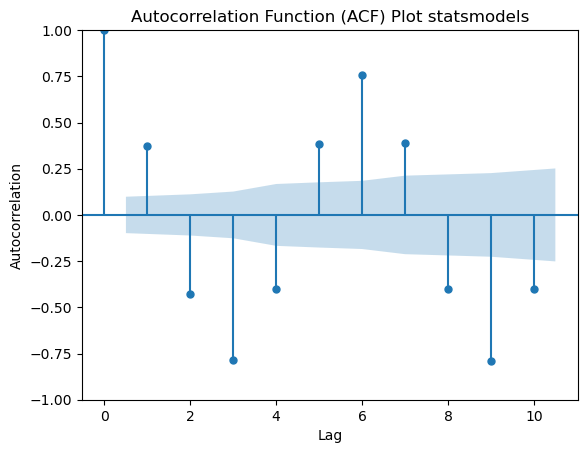

In [12]:
plot_acf(diff_1, lags=10)
plt.title('Autocorrelation Function (ACF) Plot statsmodels')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [13]:
diff_4 = np.diff(Ndata2, n=4)
diff_4

array([-1.00521e+01,  2.52960e+00, -5.28620e+00, -2.47890e+00,
        6.26530e+00,  1.07760e+00,  5.87270e+00, -4.48500e+00,
       -1.82263e+01,  1.13645e+01,  1.32512e+01, -8.44240e+00,
        2.37280e+00, -2.05840e+00, -4.86380e+00, -5.39930e+00,
        1.38788e+01, -2.74170e+00,  3.05500e+00, -3.55860e+00,
       -1.18045e+01,  3.77900e+00,  1.50533e+01, -9.03480e+00,
        5.46620e+00, -3.02820e+00, -8.48180e+00,  2.60510e+00,
        3.70100e-01,  1.27341e+01, -5.75890e+00, -3.39960e+00,
       -5.05520e+00, -9.33110e+00,  2.50193e+01, -9.86310e+00,
        5.43120e+00, -4.09490e+00, -9.67900e+00,  4.10970e+00,
       -4.68950e+00,  2.29987e+01, -1.30142e+01, -1.16420e+00,
       -1.25044e+01,  1.10376e+01,  3.79170e+00, -6.02000e+00,
        1.45606e+01, -1.23630e+01, -4.80360e+00,  1.08900e-01,
        3.10710e+00,  1.12729e+01, -4.74070e+00,  9.77100e-01,
       -3.21849e+01,  3.44939e+01,  2.95580e+00, -1.57162e+01,
        1.15572e+01, -3.76620e+00, -1.02328e+01,  3.432

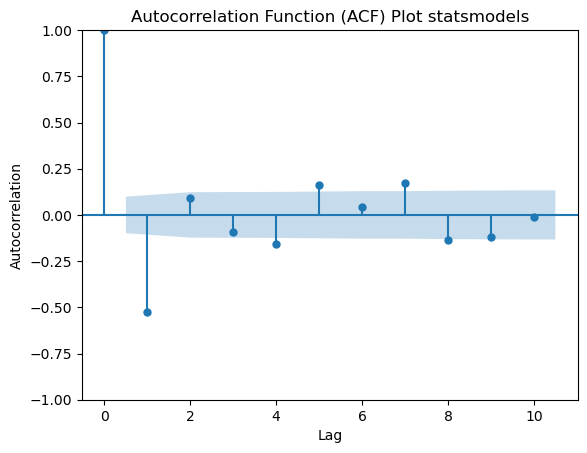

In [14]:
plot_acf(diff_4, lags=10)
plt.title('Autocorrelation Function (ACF) Plot statsmodels')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()